不同乘客等级的生还率：
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


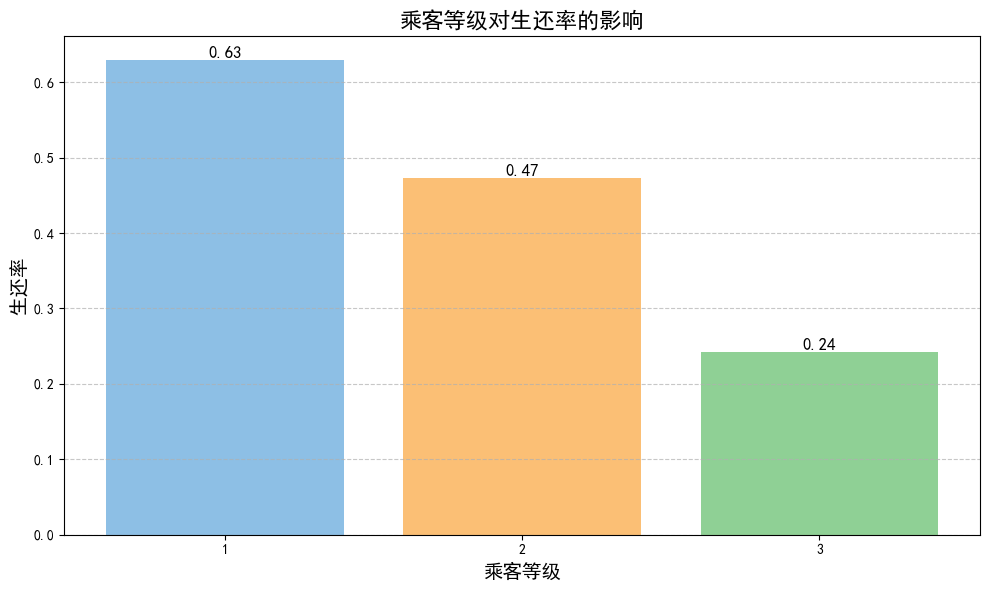


不同年龄段的生还率：
  AgeGroup  Survived
0     0-10  0.612903
1    11-20  0.401961
2    21-30  0.350000
3    31-40  0.437126
4    41-50  0.382022
5    51-60  0.416667
6    61-70  0.315789
7    71-80  0.000000


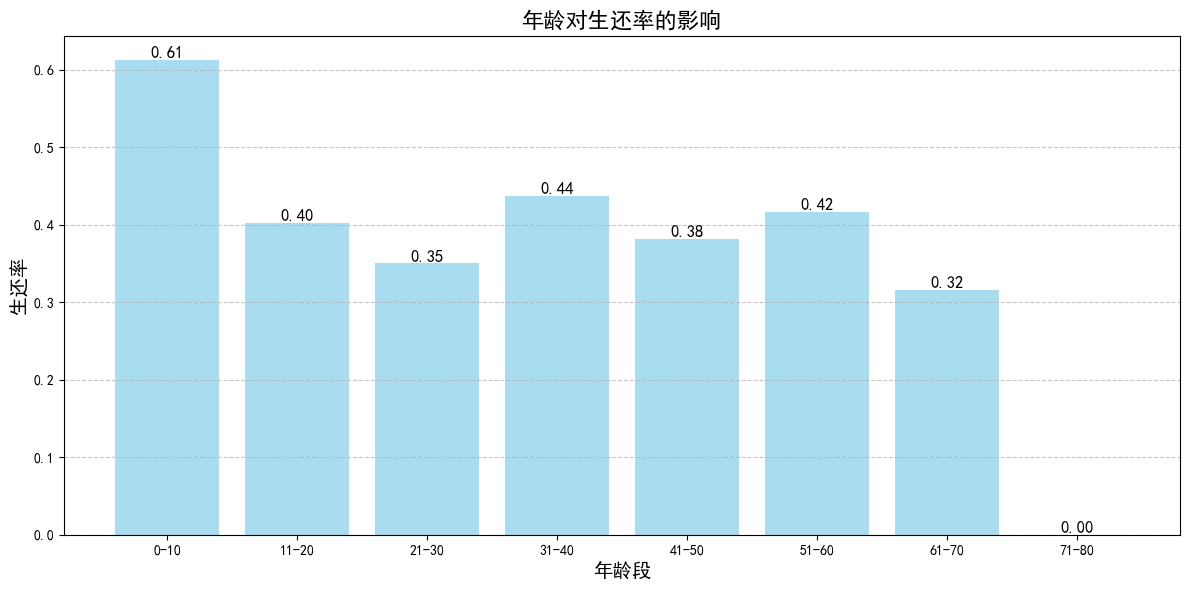

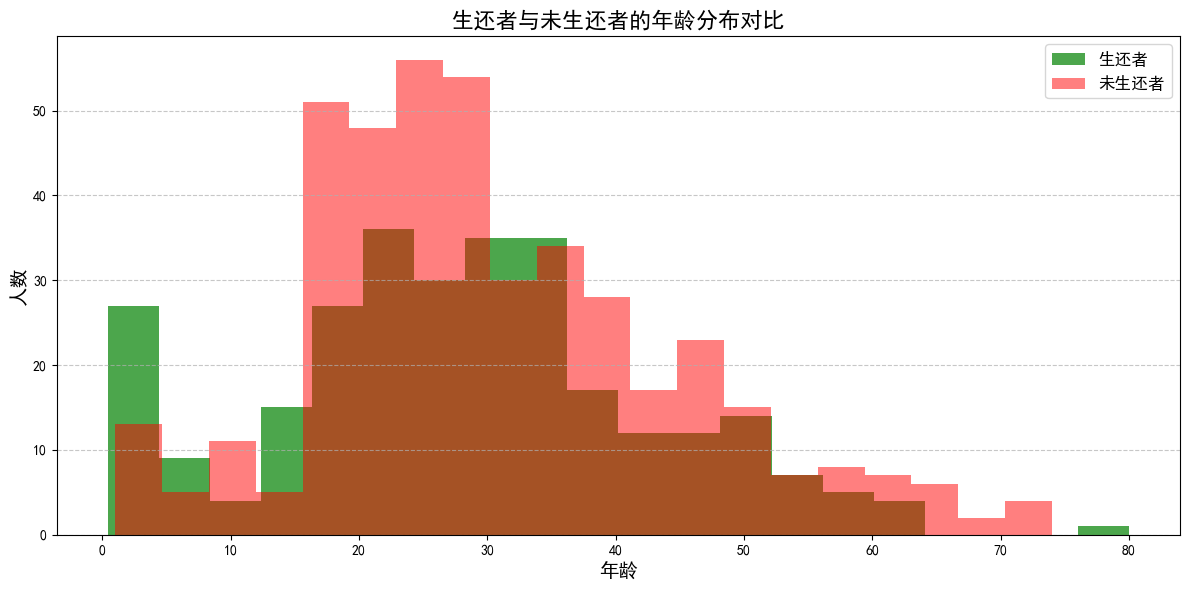

C:\Users\86150\AppData\Local\Temp\ipykernel_41128\831529693.py:152: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_age_survival = df_age.groupby(['Sex', 'AgeGroup'])['Survived'].mean().unstack()



不同性别和年龄段的生还率：
AgeGroup      0-10     11-20     21-30     31-40     41-50     51-60  \
Sex                                                                    
female    0.633333  0.755556  0.722222  0.833333  0.687500  0.888889   
male      0.593750  0.122807  0.168919  0.214953  0.210526  0.133333   

AgeGroup     61-70  71-80  
Sex                        
female    1.000000    NaN  
male      0.133333    0.0  


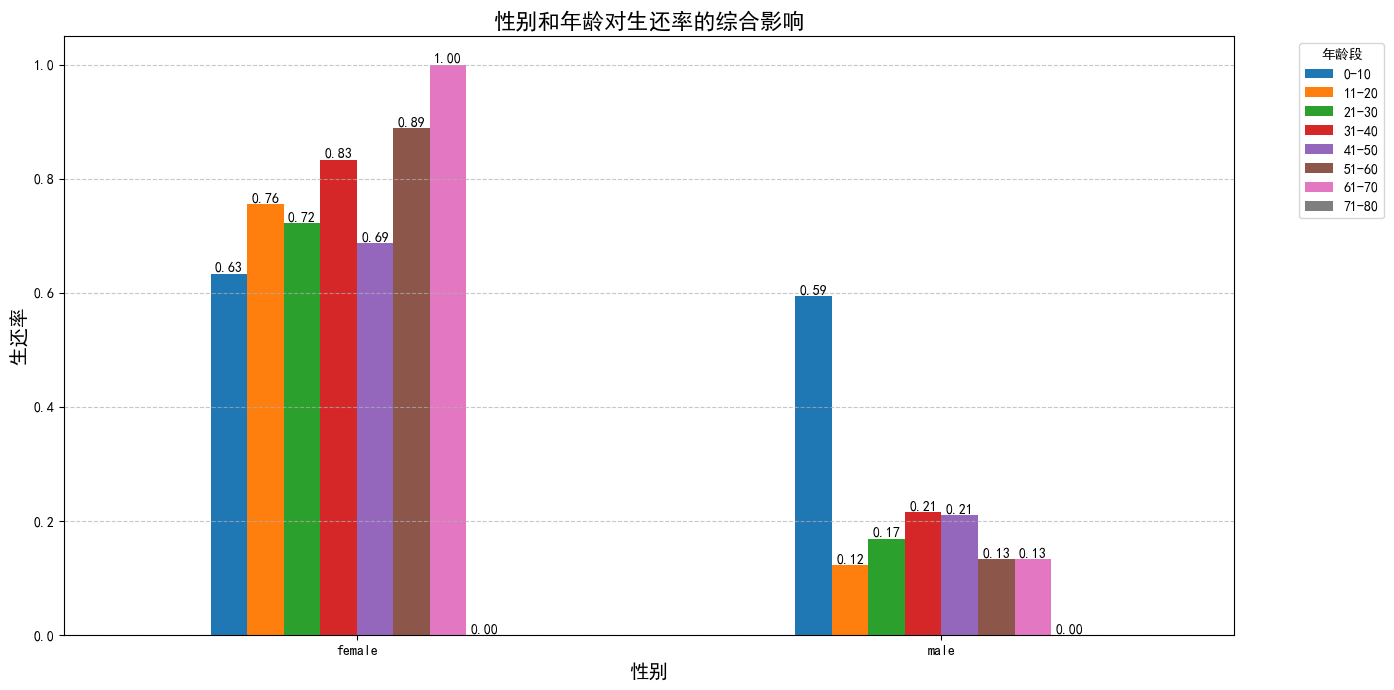

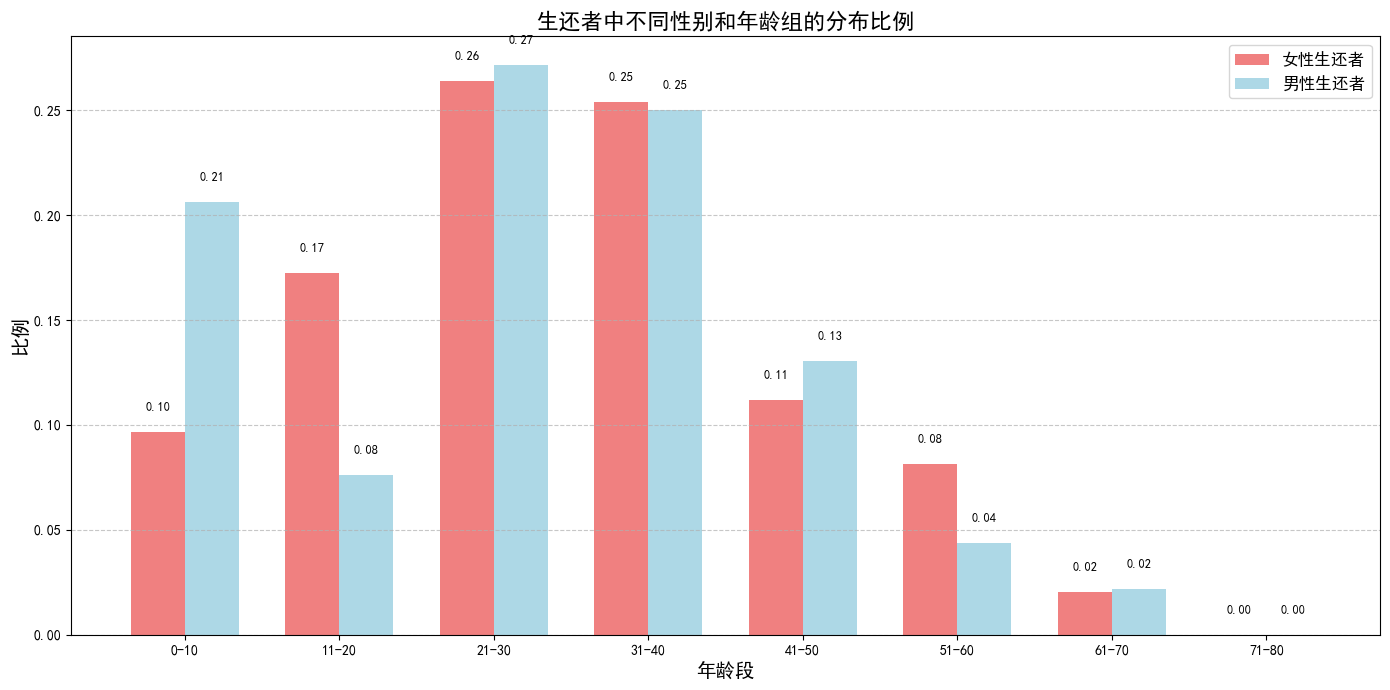

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# 设置中文字体，确保中文能正常显示
plt.rcParams["font.family"] = ["SimHei"]

# 定义文件路径
file_path = r"D:\Ye-PT\day3\exercise_data\train.csv"

# 检查文件是否存在
if not os.path.exists(file_path):
    print(f"错误：文件 {file_path} 不存在！")
else:
    try:
        # 读取CSV文件
        df = pd.read_csv(file_path)
        
        # 计算不同乘客等级(Pclass)的生还率
        survival_rate_by_class = df.groupby('Pclass')['Survived'].mean().reset_index()
        
        # 输出结果
        print("不同乘客等级的生还率：")
        print(survival_rate_by_class)
        
        # 创建直方图
        plt.figure(figsize=(10, 6))
        bars = plt.bar(
            survival_rate_by_class['Pclass'], 
            survival_rate_by_class['Survived'], 
            color=['#5DA5DA', '#FAA43A', '#60BD68'],
            alpha=0.7
        )
        
        # 添加数据标签
        for bar in bars:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width()/2., 
                height,
                f'{height:.2f}',
                ha='center', 
                va='bottom',
                fontsize=12
            )
        
        # 设置图表标题和坐标轴标签
        plt.title('乘客等级对生还率的影响', fontsize=16)
        plt.xlabel('乘客等级', fontsize=14)
        plt.ylabel('生还率', fontsize=14)
        
        # 设置x轴刻度为整数1、2、3
        plt.xticks(survival_rate_by_class['Pclass'])
        
        # 添加网格线
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        
        # 显示图表
        plt.tight_layout()
        plt.show()
        
        # 年龄对生还率的影响分析（保留之前的单因素分析）
        # 使用copy()方法创建DataFrame的副本，避免SettingWithCopyWarning
        df_age = df.dropna(subset=['Age']).copy()
        
        # 创建年龄分组
        bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
        labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
        
        # 使用.loc方法设置值，进一步确保不会触发警告
        df_age.loc[:, 'AgeGroup'] = pd.cut(df_age['Age'], bins=bins, labels=labels, right=False)
        
        # 计算各年龄组的生还率，显式设置observed参数以避免FutureWarning
        survival_rate_by_age = df_age.groupby('AgeGroup', observed=False)['Survived'].mean().reset_index()
        
        # 输出结果
        print("\n不同年龄段的生还率：")
        print(survival_rate_by_age)
        
        # 创建年龄对生还率影响的直方图
        plt.figure(figsize=(12, 6))
        bars_age = plt.bar(
            survival_rate_by_age['AgeGroup'], 
            survival_rate_by_age['Survived'], 
            color='skyblue',
            alpha=0.7
        )
        
        # 添加数据标签
        for bar in bars_age:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width()/2., 
                height,
                f'{height:.2f}',
                ha='center', 
                va='bottom',
                fontsize=12
            )
        
        # 设置图表标题和坐标轴标签
        plt.title('年龄对生还率的影响', fontsize=16)
        plt.xlabel('年龄段', fontsize=14)
        plt.ylabel('生还率', fontsize=14)
        
        # 添加网格线
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        
        # 显示图表
        plt.tight_layout()
        plt.show()
        
        # 生还者与未生还者的年龄分布对比
        plt.figure(figsize=(12, 6))
        
        # 绘制生还者的年龄分布
        plt.hist(
            df_age[df_age['Survived'] == 1]['Age'], 
            bins=20, 
            alpha=0.7, 
            label='生还者',
            color='green'
        )
        
        # 绘制未生还者的年龄分布
        plt.hist(
            df_age[df_age['Survived'] == 0]['Age'], 
            bins=20, 
            alpha=0.5, 
            label='未生还者',
            color='red'
        )
        
        # 设置图表标题和坐标轴标签
        plt.title('生还者与未生还者的年龄分布对比', fontsize=16)
        plt.xlabel('年龄', fontsize=14)
        plt.ylabel('人数', fontsize=14)
        
        # 添加图例
        plt.legend(fontsize=12)
        
        # 添加网格线
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        
        # 显示图表
        plt.tight_layout()
        plt.show()
        
        # 性别和年龄对生还率的综合影响分析
        # 计算不同性别和年龄组的生还率
        gender_age_survival = df_age.groupby(['Sex', 'AgeGroup'])['Survived'].mean().unstack()
        
        # 输出结果
        print("\n不同性别和年龄段的生还率：")
        print(gender_age_survival)
        
        # 创建性别和年龄对生还率影响的柱状图
        plt.figure(figsize=(14, 7))
        ax = gender_age_survival.plot(kind='bar', ax=plt.gca())
        
        # 添加数据标签
        for p in ax.patches:
            width = p.get_width()
            height = p.get_height()
            x, y = p.get_xy()
            ax.annotate(
                f'{height:.2f}',
                (x + width/2, y + height),
                ha='center',
                va='bottom',
                fontsize=10
            )
        
        # 设置图表标题和坐标轴标签
        plt.title('性别和年龄对生还率的综合影响', fontsize=16)
        plt.xlabel('性别', fontsize=14)
        plt.ylabel('生还率', fontsize=14)
        plt.xticks(rotation=0)
        
        # 添加网格线
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        
        # 调整图例位置
        plt.legend(title='年龄段', bbox_to_anchor=(1.05, 1), loc='upper left')
        
        # 显示图表
        plt.tight_layout()
        plt.show()
        
        # 生还者中不同性别和年龄组的分布
        plt.figure(figsize=(14, 7))
        
        # 女性生还者按年龄分布
        female_survivors = df_age[(df_age['Sex'] == 'female') & (df_age['Survived'] == 1)]
        female_age_dist = female_survivors['AgeGroup'].value_counts(normalize=True).sort_index()
        
        # 男性生还者按年龄分布
        male_survivors = df_age[(df_age['Sex'] == 'male') & (df_age['Survived'] == 1)]
        male_age_dist = male_survivors['AgeGroup'].value_counts(normalize=True).sort_index()
        
        # 创建柱状图对比
        x = np.arange(len(labels))
        width = 0.35
        
        plt.bar(x - width/2, female_age_dist.values, width, label='女性生还者', color='lightcoral')
        plt.bar(x + width/2, male_age_dist.values, width, label='男性生还者', color='lightblue')
        
        # 添加数据标签
        for i, v in enumerate(female_age_dist.values):
            plt.text(i - width/2, v + 0.01, f'{v:.2f}', ha='center', fontsize=9)
        for i, v in enumerate(male_age_dist.values):
            plt.text(i + width/2, v + 0.01, f'{v:.2f}', ha='center', fontsize=9)
        
        # 设置图表标题和坐标轴标签
        plt.title('生还者中不同性别和年龄组的分布比例', fontsize=16)
        plt.xlabel('年龄段', fontsize=14)
        plt.ylabel('比例', fontsize=14)
        plt.xticks(x, labels)
        
        # 添加图例
        plt.legend(fontsize=12)
        
        # 添加网格线
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        
        # 显示图表
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"错误：发生了异常 - {e}")    